In [9]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

from subprocess import check_output
print(check_output(["ls", "../Rental Kaggle/"]).decode("utf8"))

prepross.ipynb
test.json
train.json



In [10]:
train_df=pd.read_json('train.json')
train_df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium


In [11]:
test_df = pd.read_json("test.json")
test_df.head(3).T

,0,1,2
bathrooms,1,1,1
bedrooms,1,2,0
building_id,79780be1514f645d7e6be99a3de696c5,0,0
created,2016-06-11 05:29:41,2016-06-24 06:36:34,2016-06-17 01:23:39
description,Large with awesome terrace--accessible via bed...,Prime Soho - between Bleecker and Houston - Ne...,Spacious studio in Prime Location. Cleanbuildi...
display_address,Suffolk Street,Thompson Street,Sullivan Street
features,"[Elevator, Laundry in Building, Laundry in Uni...","[Pre-War, Dogs Allowed, Cats Allowed]","[Pre-War, Dogs Allowed, Cats Allowed]"
latitude,40.7185,40.7278,40.726
listing_id,7142618,7210040,7174566
longitude,-73.9865,-74,-74.0026


In [12]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


### Quantitive columns

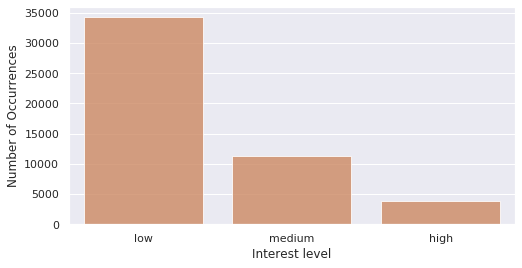

In [13]:
## Preview the target column
color = sns.color_palette()
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

In [14]:
int_level

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

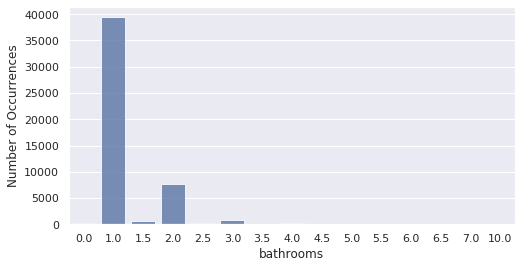

In [15]:
# bathrooms
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

/home/yuz719/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


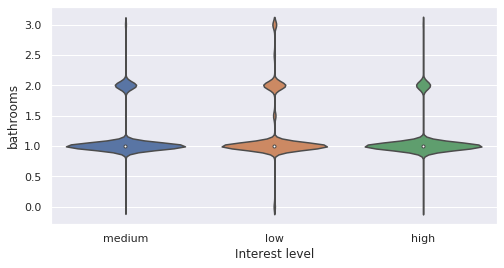

In [16]:
train_df['bathrooms'].loc[train_df['bathrooms']>3] = 3
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

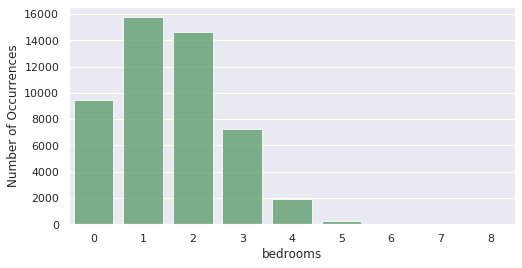

In [17]:
#bedrooms
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

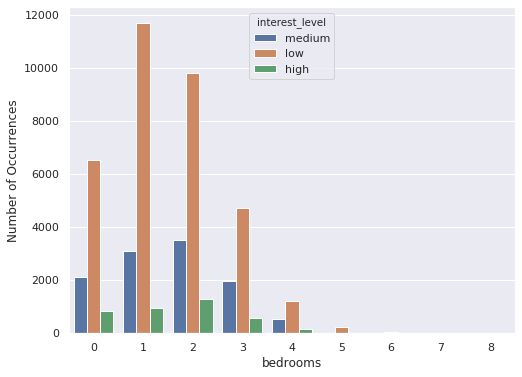

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

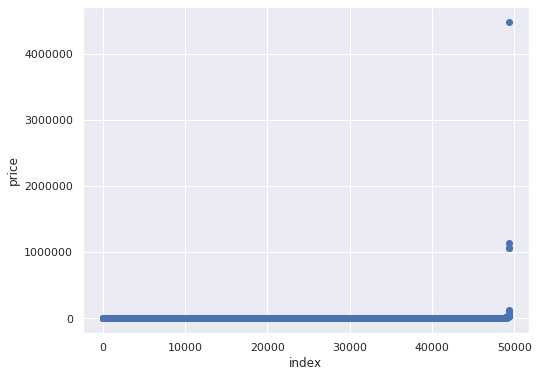

In [19]:
# price
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

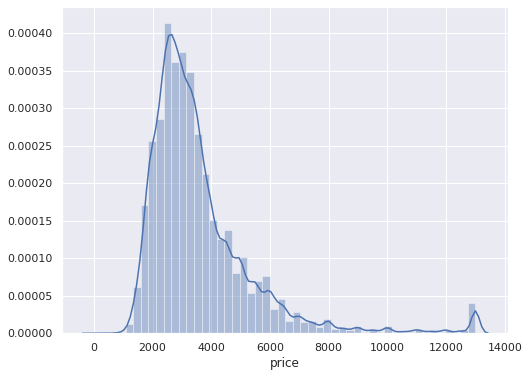

In [20]:
# get rid of outliers
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].loc[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

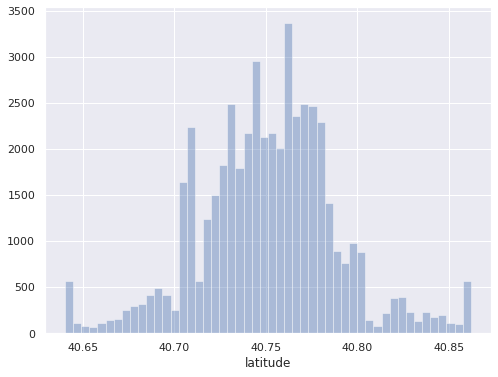

In [21]:
# position
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].loc[train_df['latitude']<llimit] = llimit
train_df['latitude'].loc[train_df['latitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

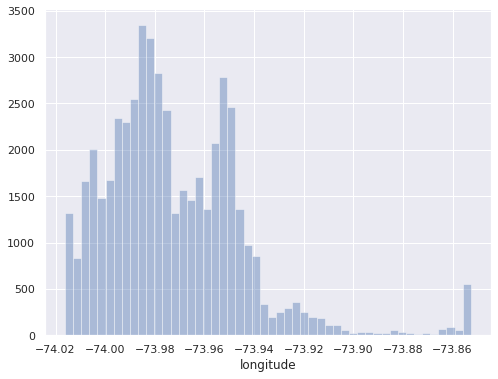

In [22]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].loc[train_df['longitude']<llimit] = llimit
train_df['longitude'].loc[train_df['longitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.show()

/home/yuz719/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


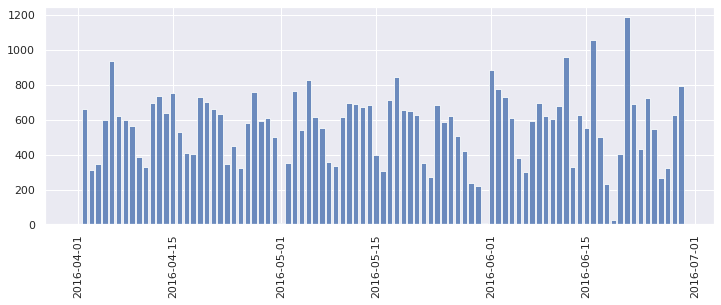

In [23]:
## creted
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date_created"] = train_df["created"].dt.date
cnt_srs = train_df['date_created'].value_counts()


plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

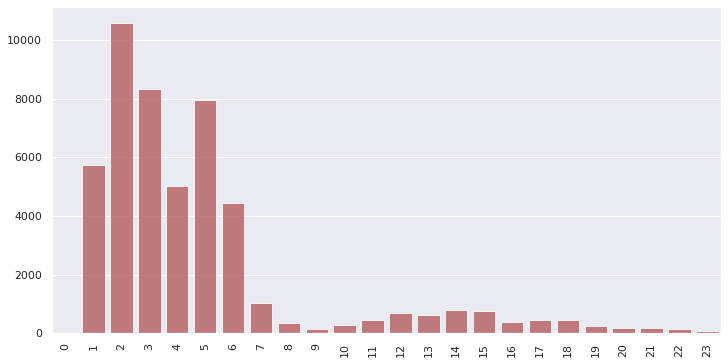

In [24]:
# hour-listing trend
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

### Categorical Columns

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


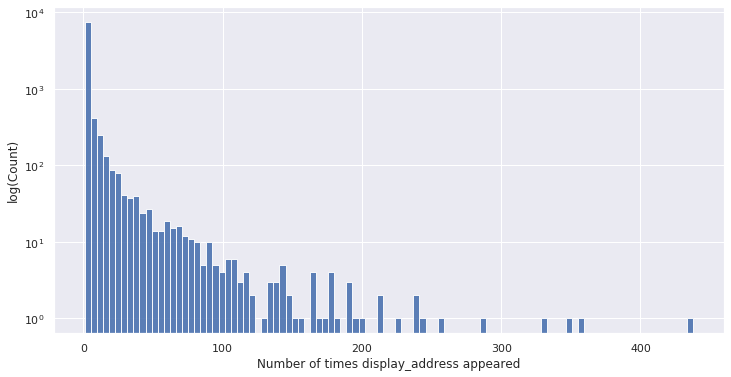

In [25]:
### Address
cnt_srs = train_df.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

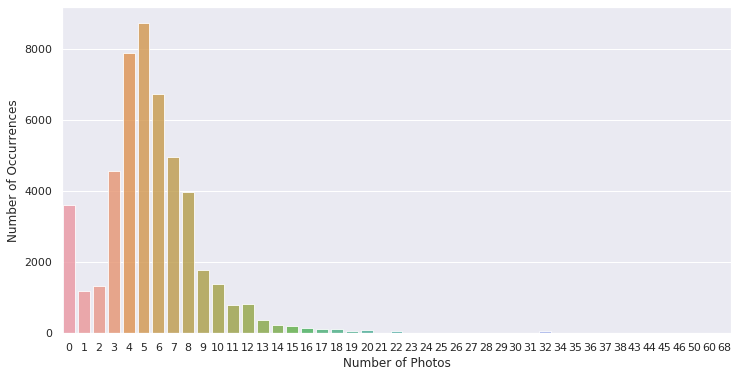

In [29]:
#photos
train_df["num_photos"] = train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

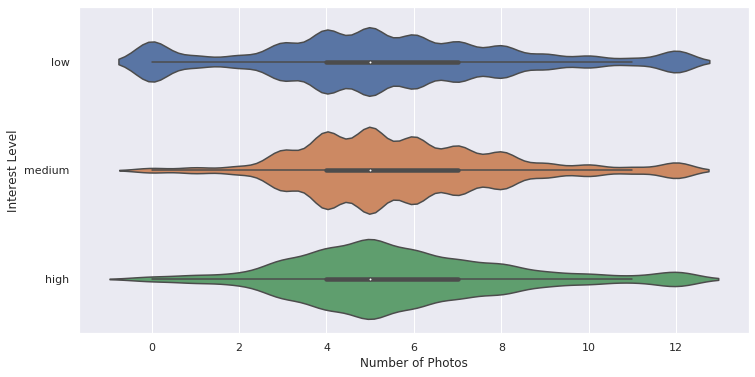

In [32]:
# number of photos
train_df['num_photos'].loc[train_df['num_photos']>12] = 12
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

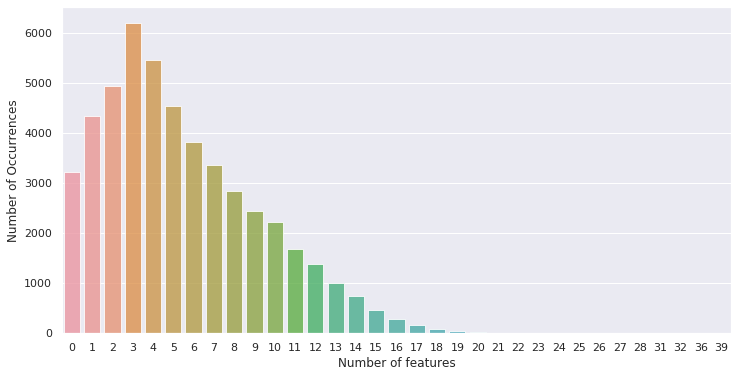

In [33]:
# Number of features in the Feature column
train_df["num_features"] = train_df["features"].apply(len)
cnt_srs = train_df['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

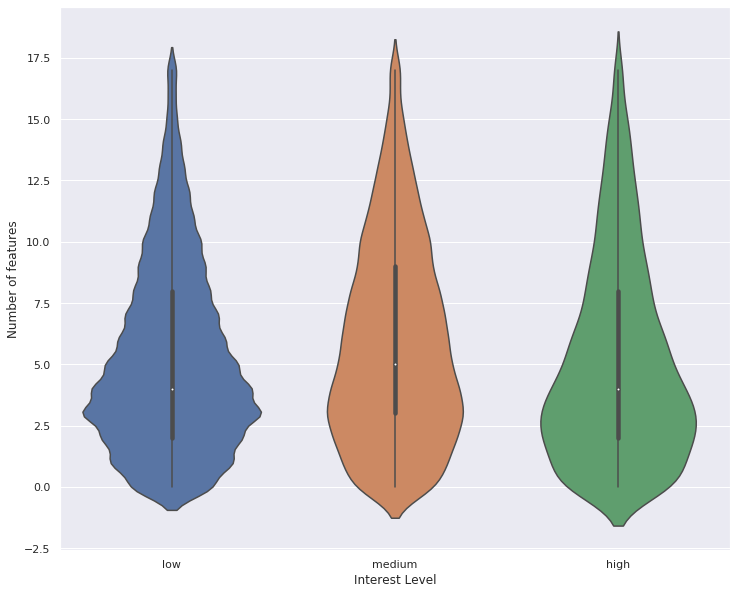

In [34]:
train_df['num_features'].loc[train_df['num_features']>17] = 17
plt.figure(figsize=(12,10))
sns.violinplot(y="num_features", x="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.show()

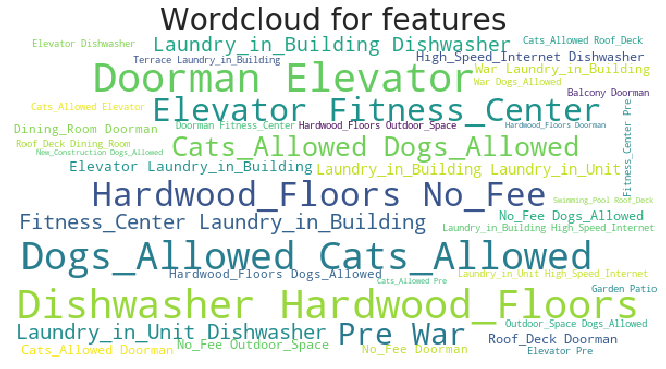

In [35]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_desc = ''
for ind, row in train_df.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

## Model (Xgboost)

In [37]:
import os
import sys
import operator
import numpy as np
import pandas as pd
from scipy import sparse
import xgboost as xgb
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [38]:
## The model function

def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [39]:
features_to_use  = ["bathrooms", "bedrooms", "latitude", "longitude", "price"]

In [41]:
# count of photos #
train_df["num_photos"] = train_df["photos"].apply(len)
test_df["num_photos"] = test_df["photos"].apply(len)

# count of "features" #
train_df["num_features"] = train_df["features"].apply(len)
test_df["num_features"] = test_df["features"].apply(len)

# count of words present in description column #
train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_description_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

# convert the created column to datetime object so as to extract more features 
train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])

# Let us extract some features like year, month, day, hour from date columns #
train_df["created_year"] = train_df["created"].dt.year
test_df["created_year"] = test_df["created"].dt.year
train_df["created_month"] = train_df["created"].dt.month
test_df["created_month"] = test_df["created"].dt.month
train_df["created_day"] = train_df["created"].dt.day
test_df["created_day"] = test_df["created"].dt.day
train_df["created_hour"] = train_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

# adding all these new features to use list #
features_to_use.extend(["num_photos", "num_features", "num_description_words","created_year", "created_month", "created_day", "listing_id", "created_hour"])

In [42]:
## Categorical features
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if train_df[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_df[f].values) + list(test_df[f].values))
            train_df[f] = lbl.transform(list(train_df[f].values))
            test_df[f] = lbl.transform(list(test_df[f].values))
            features_to_use.append(f)

In [43]:
#We have features column which is a list of string values. 
#So we can first combine all the strings together to get a single string and then apply count vectorizer on top of it.
train_df['features'] = train_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
test_df['features'] = test_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
print(train_df["features"].head())
tfidf = CountVectorizer(stop_words='english', max_features=200)
tr_sparse = tfidf.fit_transform(train_df["features"])
te_sparse = tfidf.transform(test_df["features"])

4     Dining_Room Pre-War Laundry_in_Building Dishwa...
6     Doorman Elevator Laundry_in_Building Dishwashe...
9     Doorman Elevator Laundry_in_Building Laundry_i...
10                                                     
15    Doorman Elevator Fitness_Center Laundry_in_Bui...
Name: features, dtype: object


In [44]:
# Combine sparse and dense features
train_X = sparse.hstack([train_df[features_to_use], tr_sparse]).tocsr()
test_X = sparse.hstack([test_df[features_to_use], te_sparse]).tocsr()

target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))
print(train_X.shape, test_X.shape)

(49352, 217) (74659, 217)


### Cross Validation

In [46]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train_X.shape[0])):
        dev_X, val_X = train_X[dev_index,:], train_X[val_index,:]
        dev_y, val_y = train_y[dev_index], train_y[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

[0]	train-mlogloss:1.04299	test-mlogloss:1.0436
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:0.995612	test-mlogloss:0.997492
[2]	train-mlogloss:0.953195	test-mlogloss:0.955517
[3]	train-mlogloss:0.917379	test-mlogloss:0.920149
[4]	train-mlogloss:0.88257	test-mlogloss:0.885993
[5]	train-mlogloss:0.853819	test-mlogloss:0.858008
[6]	train-mlogloss:0.827306	test-mlogloss:0.832242
[7]	train-mlogloss:0.805621	test-mlogloss:0.811104
[8]	train-mlogloss:0.782999	test-mlogloss:0.789233
[9]	train-mlogloss:0.764402	test-mlogloss:0.771152
[10]	train-mlogloss:0.74668	test-mlogloss:0.754053
[11]	train-mlogloss:0.73202	test-mlogloss:0.740064
[12]	train-mlogloss:0.718931	test-mlogloss:0.727527
[13]	train-mlogloss:0.707308	test-mlogloss:0.71676
[14]	train-mlogloss:0.6967	test-mlogloss:0.706852
[15]	train-mlogloss:0.686361	test-mlogloss:0.697388
[16]	train-mlogloss:0.677746	test-ml

[161]	train-mlogloss:0.45112	test-mlogloss:0.553336
[162]	train-mlogloss:0.45037	test-mlogloss:0.553307
[163]	train-mlogloss:0.449528	test-mlogloss:0.553083
[164]	train-mlogloss:0.449049	test-mlogloss:0.552992
[165]	train-mlogloss:0.44849	test-mlogloss:0.552888
[166]	train-mlogloss:0.44805	test-mlogloss:0.552763
[167]	train-mlogloss:0.447237	test-mlogloss:0.552667
[168]	train-mlogloss:0.446462	test-mlogloss:0.552458
[169]	train-mlogloss:0.446045	test-mlogloss:0.552347
[170]	train-mlogloss:0.445374	test-mlogloss:0.552344
[171]	train-mlogloss:0.444786	test-mlogloss:0.552207
[172]	train-mlogloss:0.444151	test-mlogloss:0.552202
[173]	train-mlogloss:0.443625	test-mlogloss:0.552096
[174]	train-mlogloss:0.443018	test-mlogloss:0.552028
[175]	train-mlogloss:0.442323	test-mlogloss:0.552076
[176]	train-mlogloss:0.44149	test-mlogloss:0.551861
[177]	train-mlogloss:0.440856	test-mlogloss:0.551691
[178]	train-mlogloss:0.440082	test-mlogloss:0.551518
[179]	train-mlogloss:0.439517	test-mlogloss:0.55140

[321]	train-mlogloss:0.366433	test-mlogloss:0.544601
[322]	train-mlogloss:0.366028	test-mlogloss:0.544579
[323]	train-mlogloss:0.365874	test-mlogloss:0.544574
[324]	train-mlogloss:0.365526	test-mlogloss:0.544517
[325]	train-mlogloss:0.364963	test-mlogloss:0.544575
[326]	train-mlogloss:0.36446	test-mlogloss:0.544512
[327]	train-mlogloss:0.363971	test-mlogloss:0.544467
[328]	train-mlogloss:0.363525	test-mlogloss:0.544505
[329]	train-mlogloss:0.363156	test-mlogloss:0.544427
[330]	train-mlogloss:0.3627	test-mlogloss:0.544449
[331]	train-mlogloss:0.362271	test-mlogloss:0.544528
[332]	train-mlogloss:0.361867	test-mlogloss:0.544493
[333]	train-mlogloss:0.361375	test-mlogloss:0.544413
[334]	train-mlogloss:0.360859	test-mlogloss:0.544297
[335]	train-mlogloss:0.360446	test-mlogloss:0.54422
[336]	train-mlogloss:0.359916	test-mlogloss:0.544272
[337]	train-mlogloss:0.359438	test-mlogloss:0.544203
[338]	train-mlogloss:0.358998	test-mlogloss:0.544137
[339]	train-mlogloss:0.358572	test-mlogloss:0.5441

In [ ]:
preds, model = runXGB(train_X, train_y, test_X, num_rounds=400)